In [171]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [172]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [173]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pickle
from sklearn.preprocessing import StandardScaler

In [174]:
output_file_path = "/data/private/pdutta/Wang_collaborator/PCA_result"

In [175]:
df = pd.read_excel("/data/private/pdutta/Wang_collaborator/Survival_vs_death_first_day.xlsx")
df.shape

(10788, 49)

In [176]:
df.head(20)

,MouseNo,Severity,Death_0 /Survival_1,CD4,CD8a,CD25,IFN-γ,GM-CSF,IL-4,IL-5,...,Granzyme B,CCL4,CD15,CD182,CD197,IL-21,HLA-DR,CD181,β-Actin,IL-22
0,1,1,1,864.202653,653.388036,533.532407,622.283386,601.880699,523.256709,610.188377,...,648.804947,585.191381,622.984062,507.160020,521.665598,745.204173,625.576933,890.473356,730.239695,606.385944
1,1,1,1,502.256482,568.373980,988.122802,598.716245,645.511790,551.418641,560.904324,...,566.797908,902.976225,541.336585,509.972729,532.145073,513.079211,579.316823,536.086193,690.569707,538.364672
2,1,1,1,463.854773,543.952941,1117.471229,1105.009940,715.989935,541.132319,540.647678,...,587.347451,737.662682,515.291416,780.231103,606.187356,715.505628,569.176593,647.409062,584.242162,537.659564
3,1,1,1,2302.596767,1930.261640,588.094329,2349.308486,1805.575452,751.555302,2199.713286,...,972.315900,534.148282,679.868074,517.515480,490.278047,688.949714,524.763762,517.817829,763.693559,657.198799
4,1,1,1,1058.718278,3091.961426,523.016158,1387.892393,961.391537,963.863794,1837.281826,...,756.944868,1041.256293,543.882557,504.251373,510.271727,610.724690,582.022937,601.456194,720.723971,662.802631
5,1,1,1,2418.428574,845.549889,504.169945,714.724978,1473.802184,1024.840705,1823.074582,...,833.234533,983.239167,620.761161,568.014233,517.090090,626.185674,514.810013,546.470574,703.633271,557.380318
6,1,1,1,2010.637201,2838.474841,529.289258,742.795405,1366.229126,892.249453,983.676275,...,663.685095,1468.113192,637.723136,542.737009,575.964986,636.125353,502.147592,556.446473,878.825424,541.504603
7,1,1,1,1423.890754,954.820268,513.026226,2177.669702,1360.817371,813.376838,2209.773142,...,557.106513,569.331972,576.766093,499.874387,543.436410,574.512953,516.323004,505.780581,634.883564,578.725316
8,1,1,1,1768.039773,841.160408,552.858108,2433.787251,1451.730380,995.562072,1947.466785,...,685.863976,1040.576883,629.455859,524.466321,509.876372,577.984592,550.098389,514.365746,618.125529,512.396249
9,1,1,1,737.596065,945.982474,584.048760,2424.724093,1376.149390,848.858780,1784.940630,...,792.719267,905.189311,642.509867,496.837116,501.755556,601.063696,534.524566,560.327773,633.589630,583.589784


In [177]:
df.groupby('Severity').size()

Severity
1    2056
2    3023
3    2806
4    2903
dtype: int64

In [88]:
df.columns

Index(['MouseNo', 'Severity', 'Death_0 /Survival_1', 'CD4', 'CD8a', 'CD25',
       'IFN-γ', 'GM-CSF', 'IL-4', 'IL-5', 'IL-6', 'CD18', 'CD28', 'CD62L',
       'CD279', 'IL-1β', 'IL-2', 'IL-9', 'IL-10', 'TNF-α', 'CD69', 'IL-12',
       'IL-17A', 'Perforin', 'CD32', 'CD191', 'CD193', 'VEGF', 'CD11b', 'CD14',
       'CD55', 'CD183', 'CD284', 'TGF-β', 'CD66a', 'CD184', 'CD185', 'CD194',
       'CD196', 'Granzyme B', 'CCL4', 'CD15', 'CD182', 'CD197', 'IL-21',
       'HLA-DR', 'CD181', 'β-Actin', 'IL-22'],
      dtype='object')

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,3:], df['Severity'].to_list(), test_size=0.2, random_state=0)

In [131]:
clf = RandomForestClassifier(n_estimators = 1000) 
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Random forest", metrics.accuracy_score(Y_pred, Y_test))

Random forest 0.8188137164040779


In [164]:
def all_classifier(data, label, accuracy_list):
    X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.2, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    ## Random Forest Classifier
    clf = RandomForestClassifier(n_estimators = 100) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Random forest", metrics.accuracy_score(Y_pred, Y_test))
    accuracy_list.append(metrics.accuracy_score(Y_pred, Y_test))
    
    # ## Logistic regresiion 
    # lr = LogisticRegression(random_state = 0)
    # lr.fit(X_train, Y_train)
    # y_pred_lr = lr.predict(X_test)
    # print("LR", metrics.accuracy_score(y_pred_lr, Y_test))
    
    ## K-nearest neighbour classifier
    knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    print("KNN", metrics.accuracy_score(Y_pred_knn, Y_test))
    accuracy_list.append(metrics.accuracy_score(Y_pred_knn, Y_test))
    
    
    ##  SVC (Support Vector Classifier) with Linear Kernel
    svc = SVC(kernel = 'linear', random_state = 0)
    svc.fit(X_train, Y_train)
    Y_pred_svc = svc.predict(X_test)
    print("SVC_linear", metrics.accuracy_score(Y_pred_svc, Y_test))
    accuracy_list.append(metrics.accuracy_score(Y_pred_svc, Y_test))
    
    ## SVM
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    Y_pred_svm = svc_rbf.predict(X_test)
    print("SVC_svm", metrics.accuracy_score(Y_pred_svm, Y_test))
    accuracy_list.append(metrics.accuracy_score(Y_pred_svm, Y_test))
    
    
    ##Naïve Bayes(Gaussian)

    nb = GaussianNB()
    nb.fit(X_train, Y_train)
    Y_pred_nb = nb.predict(X_test)
    print("Naïve Bayes(Gaussian)", metrics.accuracy_score(Y_pred_nb, Y_test))
    accuracy_list.append(metrics.accuracy_score(Y_pred_nb, Y_test))
    
    

    ## AdaBoostClassifier
    abc = AdaBoostClassifier()
    abc.fit(X_train, Y_train)
    Y_pred_abc = abc.predict(X_test)
    print("AdaBoostClassifier", metrics.accuracy_score(Y_pred_abc, Y_test))
    accuracy_list.append(metrics.accuracy_score(Y_pred_abc, Y_test))
    

    # ## Quadratic Discriminant Analysis
    # qda = QuadraticDiscriminantAnalysis()
    # qda.fit(X_train, Y_train)
    # Y_pred_qda = qda.predict(X_test)
    # print("Quadratic Discriminant Analysis", metrics.accuracy_score(Y_pred_qda, Y_test))
    
    ## Multilayer perceptron
    mlp = MLPClassifier(alpha=1, max_iter=1000, activation='relu', hidden_layer_sizes = (100, 50, ))
    mlp.fit(X_train, Y_train)
    Y_pred_mlp = mlp.predict(X_test)
    print("MLP Classifier", metrics.accuracy_score(Y_pred_mlp, Y_test))
    accuracy_list.append(metrics.accuracy_score(Y_pred_mlp, Y_test))
    
    
    print("\n")
    return(accuracy_list) 

# Principal Component Analysis

In [165]:
PCA_components = [ 2, 3,4,5,6,7,8,9,10, 11,12, 13, 14, 15, 16, 17, 18, 19 ,20]
grouped_df =  df.groupby(['MouseNo'])
all_accuracy_list = []
for component in PCA_components:
    reduce_final_df = [] 
    labels = []
    temp_accuracy_list = []
    for key, item in grouped_df:
        severity = item['Severity'].to_list()[0]
        temp_df = grouped_df.get_group(key).reset_index(drop=True).iloc[:,3:].to_numpy()
        temp_data_tran = temp_df.transpose()
        #print(temp_data_tran.shape)
        pca = PCA(n_components=component)
        principalComponents = pca.fit_transform(temp_data_tran)
        reduce_features = principalComponents.transpose()
        #print(reduce_features)
        reduce_final_df.append(reduce_features)
        labels.append(component * [severity])
    final_df = np.concatenate(reduce_final_df)
    final_labels = [item for sublist in labels for item in sublist]
    #print(final_df.shape)
    #print(final_labels)
    accuracy_list = all_classifier(final_df , final_labels, temp_accuracy_list)
    all_accuracy_list.append(accuracy_list)
accuracy_numpy = np.array(all_accuracy_list)
#print(accuracy_numpy)
# cluster_numbers = [2, 3,4, 5, 6,7,8,9,10,20, 30, 40, 50]
# for i in cluster_numbers:
#     print(i)
#     cluster = KMeans(n_clusters=i).fit(entire_data)
#     pickle.dump(cluster, open(output_file_path + '/kmeans_{}.pkl'.format(i), 'wb'))

Random forest 0.375
KNN 0.125
SVC_linear 0.875
SVC_svm 0.125
Naïve Bayes(Gaussian) 0.375
AdaBoostClassifier 0.25
MLP Classifier 0.875


Random forest 0.3333333333333333
KNN 0.5
SVC_linear 0.75
SVC_svm 0.16666666666666666
Naïve Bayes(Gaussian) 0.3333333333333333
AdaBoostClassifier 0.3333333333333333
MLP Classifier 0.5833333333333334


Random forest 0.5
KNN 0.3125
SVC_linear 0.5
SVC_svm 0.4375
Naïve Bayes(Gaussian) 0.5
AdaBoostClassifier 0.5
MLP Classifier 0.5


Random forest 0.2631578947368421
KNN 0.2631578947368421
SVC_linear 0.631578947368421
SVC_svm 0.10526315789473684
Naïve Bayes(Gaussian) 0.2631578947368421
AdaBoostClassifier 0.3684210526315789
MLP Classifier 0.47368421052631576


Random forest 0.34782608695652173
KNN 0.391304347826087
SVC_linear 0.4782608695652174
SVC_svm 0.17391304347826086
Naïve Bayes(Gaussian) 0.2608695652173913
AdaBoostClassifier 0.43478260869565216
MLP Classifier 0.34782608695652173


Random forest 0.48148148148148145
KNN 0.4444444444444444
SVC_linear 0.44444

In [166]:
y_data = np.transpose(accuracy_numpy)
y_data

array([[0.375     , 0.33333333, 0.5       , 0.26315789, 0.34782609,
        0.48148148, 0.61290323, 0.28571429, 0.5       , 0.5       ,
        0.43478261, 0.48      , 0.53703704, 0.45614035, 0.40983607,
        0.38461538, 0.53623188, 0.38356164, 0.42105263],
       [0.125     , 0.5       , 0.3125    , 0.26315789, 0.39130435,
        0.44444444, 0.35483871, 0.31428571, 0.42105263, 0.42857143,
        0.26086957, 0.34      , 0.2962963 , 0.40350877, 0.47540984,
        0.35384615, 0.42028986, 0.42465753, 0.35526316],
       [0.875     , 0.75      , 0.5       , 0.63157895, 0.47826087,
        0.44444444, 0.5483871 , 0.6       , 0.44736842, 0.42857143,
        0.2826087 , 0.34      , 0.38888889, 0.36842105, 0.31147541,
        0.36923077, 0.36231884, 0.28767123, 0.30263158],
       [0.125     , 0.16666667, 0.4375    , 0.10526316, 0.17391304,
        0.25925926, 0.32258065, 0.25714286, 0.31578947, 0.30952381,
        0.34782609, 0.34      , 0.33333333, 0.33333333, 0.31147541,
        0.230

In [167]:
x_data = np.vstack((np.arange(2, 21),)*7)

In [168]:
x_data

array([[ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]])

In [169]:
labels = ['Random forest','KNN', 'SVC_linear','SVC_svm', 'Naïve Bayes(Gaussian)','AdaBoostClassifier','MLP Classifier']

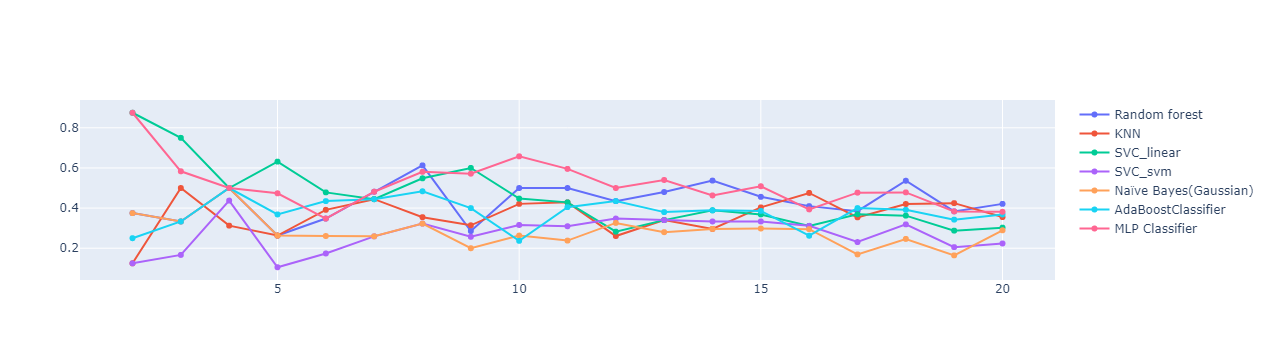

In [170]:
fig = go.Figure()

for i in range(0, 7):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines+markers',
        name=labels[i],
        connectgaps=True,
    ))
fig.show()
